# Exericse Solution for 02.13

**Motivating Question: Is there a difference in the average TTR for male and female authors?**

To answer this, go step by step.

First, I need to read in the data and recreate what we did in the tutorial.

In [1]:
import pandas
import nltk
import string
import matplotlib.pyplot as plt #note this last import statement. Why might we use "import as"?

#read in our data
df = pandas.read_csv("../data/childrens_lit.csv.bz2", sep = '\t', encoding = 'utf-8', compression = 'bz2', index_col=0)
df = df.dropna(subset=["text"])
df['text_lc'] = df['text'].str.lower()
df['text_split']=df['text_lc'].str.split()
df['word_count'] = df['text_split'].apply(len)
df

,title,author gender,year,text,text_lc,text_split,word_count
0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...,a dog with a bad name by talbot baines reed ...,"[a, dog, with, a, bad, name, by, talbot, baine...",96493
1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...,a final reckoning: a tale of bush life in aust...,"[a, final, reckoning:, a, tale, of, bush, life...",100603
2,"A House Party, Don Gesualdo, and A Rainy June",Female,1887,A HOUSE-PARTY Don Gesualdo and A Rainy June...,a house-party don gesualdo and a rainy june...,"[a, house-party, don, gesualdo, and, a, rainy,...",85132
3,A Houseful of Girls,Female,1889,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ...","a houseful of girls. by sarah tytler, author ...","[a, houseful, of, girls., by, sarah, tytler,, ...",92822
4,A Little Country Girl,Female,1885,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ...","little country girl. by susan coolidge, ...","[little, country, girl., by, susan, coolidge,,...",48251
5,A Round Dozen,Female,1883,\n A ROUND DOZEN. [Illustration: TOINETTE AND...,\n a round dozen. [illustration: toinette and...,"[a, round, dozen., [illustration:, toinette, a...",47458
6,A Sailor's Lass,Female,1886,"A SAILOR'S LASS by EMMA LESLIE, Author of ""...","a sailor's lass by emma leslie, author of ""...","[a, sailor's, lass, by, emma, leslie,, author,...",22213
7,A World of Girls,Female,1886,A WORLD OF GIRLS: THE STORY OF A SCHOOL. By ...,a world of girls: the story of a school. by ...,"[a, world, of, girls:, the, story, of, a, scho...",81524
8,Adrift in the Wild,Male,1887,Adrift in the Wilds; ...,adrift in the wilds; ...,"[adrift, in, the, wilds;, or,, the, adventures...",62437
9,Adventures in Africa,Male,1883,"ADVENTURES IN AFRICA, BY W.H.G. KINGSTON. C...","adventures in africa, by w.h.g. kingston. c...","[adventures, in, africa,, by, w.h.g., kingston...",36261


In [2]:
##Ex: create a new column, 'text_type', which contains a list of unique token types
df['text_type'] = df['text_split'].apply(set)
df['text_type']

0      {appleby,, lodge., hear,, "raby,, treats, conv...
1      {hear,, daughters,, conversation, adding, out?...
2      {alternative, teacups, hear,, mill-wheels, ad,...
3      {journeyman, daughters,, flood., signet-ring, ...
4      {"good-by,, brilliantly, chaperone., hear,, da...
5      {"good-by,, conversation, discouraged,, gingha...
6      {wanderers, brilliantly, seek, arms., disagree...
7      {lodge., "good-by,, round-faced,, treats, conv...
8      {lodge., strike;, cool!, conversation, manifes...
9      {exasperated., darted, island, roast., cattle,...
10     {direction;, darted, roast., seek, cattle, chu...
11     {treats, conversation, sick!", t., cause,--the...
12     {collisions,, baby, fight?, twice, property, g...
13     {soul!", hear,, dorothea,, signboard!, theodor...
14     {aground--a, hear,, brilliantly, being!, suppo...
15     {sitchlike., eyes--sunny, flynn.", wantoned, c...
16     {alternative, appleby,, settle,, hear,, george...
17     {island?", cowhide., man

In [3]:
##Ex: create a new column, 'type_count', which is a count of the token types in each novel.
##Ex: create a new column, 'ttr', which contains the type-token ratio for each novel.

df['type_count'] = df['text_type'].apply(len)
df['ttr'] = df['type_count']/df['word_count']
df['ttr']

0      0.140300
1      0.107124
2      0.172203
3      0.153121
4      0.186649
5      0.197311
6      0.193490
7      0.140462
8      0.149351
9      0.149417
10     0.150522
11     0.116603
12     0.225426
13     0.189853
14     0.160550
15     0.159051
16     0.105552
17     0.154569
18     0.113381
19     0.113632
20     0.121567
21     0.110592
22     0.185558
23     0.106279
24     0.117298
25     0.129177
26     0.161723
27     0.140021
28     0.140227
29     0.140817
         ...   
102    0.142216
103    0.182464
104    0.180102
105    0.119466
106    0.168030
107    0.144673
108    0.170048
109    0.114256
110    0.320192
111    0.243135
112    0.204047
113    0.151596
114    0.115570
115    0.123429
116    0.107208
117    0.128713
118    0.154788
119    0.139369
120    0.184949
121    0.108375
122    0.156410
123    0.160563
124    0.139295
125    0.163657
126    0.116841
127    0.115549
128    0.183431
129    0.121805
130    0.107914
131    0.102683
Name: ttr, dtype: float6

author gender
Female    0.178244
Male      0.142540
Name: ttr, dtype: float64


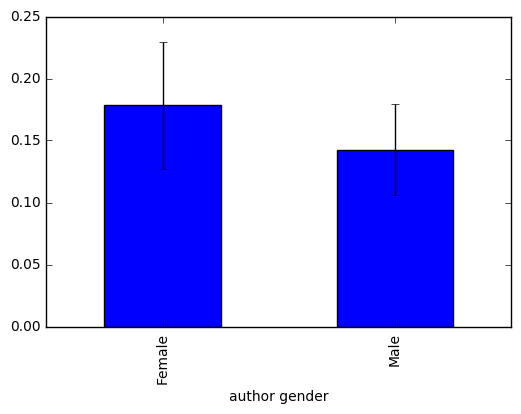

In [4]:
##Ex: Print the average ttr by author gender
##Ex: Graph this result with error bars

grouped = df.groupby('author gender')
print(grouped['ttr'].mean())

grouped['ttr'].mean().plot(kind='bar', yerr= grouped['ttr'].std())
plt.show()